TP4 : Travail final


In [117]:
import os
import PyPDF2
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from thefuzz import fuzz
from thefuzz import process
from Levenshtein import distance

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
#Lister les fichiers 
path = '../../data/camille_ecologie'

files = []
for f in os.listdir(path):
    if os.path.isfile(os.path.join(path, f)):
        files.append(f)

for f in files:
    print(f)


all.txt
BE-KBR00_15463334_19781001_99_00_00_0_01_0024_29589967.txt
BE-KBR00_15463334_19781201_100_00_00_0_01_0092_29591933.txt
BE-KBR00_15463334_19790601_101_00_00_0_01_0124_29593641.txt
BE-KBR00_15463334_19791101_103_00_00_0_01_0014_29592377.txt
BE-KBR00_15463334_19890701_137_00_00_0_01_0079_29699927.txt
KB_JB1051_1945-12-18_01-00003.txt
KB_JB1051_1951-09-05_01-00005.txt
KB_JB1051_1952-12-17_01-00004.txt
KB_JB1051_1952-12-26_01-00004.txt
KB_JB1051_1954-04-01_01-00004.txt
KB_JB1051_1958-10-15_01-00004.txt
KB_JB1051_1959-06-12_01-00001.txt
KB_JB1051_1961-03-07_01-00001.txt
KB_JB1051_1961-04-20_01-00001.txt
KB_JB1051_1961-11-20_01-00003.txt
KB_JB1051_1966-03-03_01-00002.txt
KB_JB421_1901-02-18_01-00001.txt
KB_JB421_1905-04-27_01-00001.txt
KB_JB421_1906-10-08_01-00002.txt
KB_JB421_1909-09-20_01-00001.txt
KB_JB421_1909-11-14_01-00003.txt
KB_JB421_1910-04-24_01-00002.txt
KB_JB421_1910-06-01_01-00003.txt
KB_JB427_1919-11-24_01-00002.txt
KB_JB427_1920-02-03_01-00004.txt
KB_JB427_1920-03-27_01

In [98]:
#Sauvgarde de tout les fichiers dans all.txt
txt_path = "../../data/camille_ecologie"

with open("../../data/camille_ecologie/all.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt") and file != "_README.txt":
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())
                output_file.write("\n")   


Exploration

In [99]:
#Lister les années de parytion des articles lié à l'écologie
path = "../../data/camille_ecologie"
files = sorted(os.listdir(path))
print(f"{len(files)} files found.")

784 files found.


In [100]:

count_newspapers = defaultdict(int)

# Dictionnaire pour mapper les codes aux noms des journaux
journal_names = {
    'JB421': "L'Avenir du Luxembourg",
    'JB427': "La Libre Belgique",
    'JB555': "L'Indépendance belge",
    'JB555A': "L'Indépendance belge (édité en Angleterre)",
    'JB567': "Journal de Bruxelles",
    'JB572': "Journal de Charleroi",
    'JB638': "La Meuse",
    'JB685': "Le Petit Bleu",
    'JB729': "Le Vingtième Siècle",
    'JB773': "Vers l'Avenir",
    'JB837': "Le Peuple",
    'JB838': "Le Soir",
    'JB1051': "Le Drapeau rouge",
    'B14138': "La Presse"
}

# Parcours des fichiers
for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        elems = f.split("_")
        # Cherche dans tous les éléments si l'un correspond à un code de journal
        journal_code = next((e for e in elems if e in journal_names), None)
        if journal_code:
            count_newspapers[journal_code] += 1

# Affichage des statistiques
for code, name in journal_names.items():
    print(f"{name} : {count_newspapers.get(code, 0)}")

L'Avenir du Luxembourg : 7
La Libre Belgique : 319
L'Indépendance belge : 86
L'Indépendance belge (édité en Angleterre) : 3
Journal de Bruxelles : 62
Journal de Charleroi : 32
La Meuse : 74
Le Petit Bleu : 10
Le Vingtième Siècle : 30
Vers l'Avenir : 44
Le Peuple : 20
Le Soir : 79
Le Drapeau rouge : 11
La Presse : 0


In [101]:
#Lister les années de parution des articles lié à l'écologie 
all_years = [str(year) for year in range(1887, 1990)]
print(all_years)

['1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']


In [102]:
#Lister les années pour lesquels il ny a pas de parution d'articles lié à l'écologie 
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1893, 1917, 1941, 1943, 1953, 1962, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988


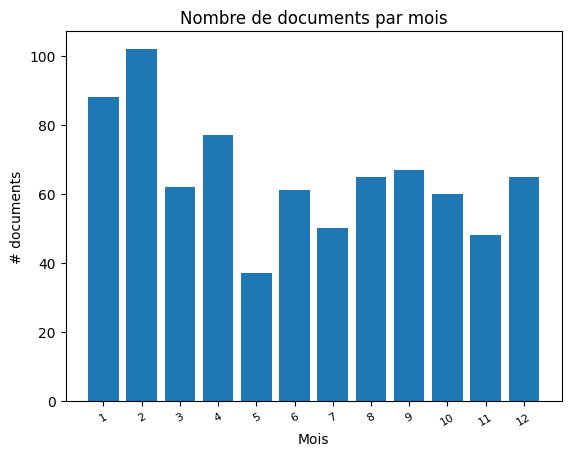

In [103]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, sorted(count_month.keys()), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

Fréquences

In [113]:
mot_cible = "ecologi".lower()
total_occurrences = 0

for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        fichier_path = os.path.join(txt_path, f)
        with open(fichier_path, "r", encoding="utf-8", errors="ignore") as file:
            contenu = file.read().lower()
            total_occurrences += contenu.count(mot_cible)

print(f"Le mot '{mot_cible}' apparaît {total_occurrences} fois au total dans le corpus.")

Le mot 'ecologi' apparaît 82 fois au total dans le corpus.


In [112]:
i=0
for f in os.listdir(txt_path):
    if f.endswith(".txt"):
        fichier_path = os.path.join(txt_path, f)
        with open(fichier_path, "r", encoding="utf-8", errors="ignore") as file:
            contenu = file.read().lower()  # tout en minuscules
            if mot_cible in contenu:
                i+=1
print(f"Le mot '{mot_cible}' apparaît dans {i} documents.")

Le mot 'écologie' apparaît dans 59 documents.


In [119]:
data_path = "../../data/camille_ecologie/all.txt"
LIMIT = 50000000
text = open(data_path, "r", encoding="utf-8").read()[:LIMIT]

tokens = nltk.wordpunct_tokenize(text)
print(f"{len(tokens)} words (tokens) found")

vocab = set(tokens)
print(f"{len(vocab)} different word forms")

7358062 words (tokens) found
414599 different word forms


In [123]:
word = "ecologie"
process.extract(word, vocab, limit=40)

[('ecologie', 100),
 ('ECOLOGIE', 100),
 ('Ecologie', 100),
 ('ecrologie', 94),
 ('ECKOLOGIE', 94),
 ('ECROLOGIe', 94),
 ('MECOLOGIE', 94),
 ('ECnOLOGIE', 94),
 ('ECROLOGiE', 94),
 ('eicologie', 94),
 ('EcnoLOGiE', 94),
 ('deCologie', 94),
 ('ECEOLOGIE', 94),
 ('eCologiie', 94),
 ('mecologie', 94),
 ('ECROlOGIE', 94),
 ('ECaOLOGIE', 94),
 ('ECHOLOGiE', 94),
 ('NECOLOGIE', 94),
 ('Ecologies', 94),
 ('echologie', 94),
 ('ECROLOGIE', 94),
 ('COlOGIE', 93),
 ('écologie', 93),
 ('eologie', 93),
 ('COlOgie', 93),
 ('CoLoGiE', 93),
 ('Écologie', 93),
 ('EOLOGIE', 93),
 ('COLOGIE', 93),
 ('CologIe', 93),
 ('àcologie', 93),
 ('Cologie', 93),
 ('ÉCOLOGIE', 93),
 ('EOlogie', 93),
 ('cologie', 93),
 ('céologie', 93),
 ('eéologie', 93),
 ('ColOgie', 93),
 ('IÏ', 90)]